Para el EDA, solo trabajaré con el df de train, analice la cantidad de valores nulos y cantidad de datos, el test lo usaré en el apartado de los modelos, por lo que ya no estará en el EDA, para que este más limpio el código.

## Cargar Datos y Limpieza de datos

In [3]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confiugarción de gráficos 
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

print('Librerías importadas correctamente')


Librerías importadas correctamente


In [4]:
# Cargar datos
data_path = r'C:\Users\candy\Downloads\arkon_ds\data\train_set.csv'
df = pd.read_csv(data_path)






- **trip_id**: identificador único para el viaje
- **duration**: duración del viaje en minutos
- **start_time**: dia/hora donde en viaje inicia en formato ISO 8601 tiempo local
- **end_time**: dia/hora donde el viaje termina en formato ISO 8601 tiempo local
- **start_station**: la estación donde el viaje inició
- **start_lat**: la latitud de la estación donde el viaje se originó
- **start_lon**: la longitud de la estación donde el viaje se originó
- **end_station**: la estación donde el viaje terminó
- **end_lat**: la latitud de la estación donde terminó el viaje
- **end_lon**: la longitud de la estación donde terminó el viaje
- **bike_id**: un entero único que identifica la bicicleta
- **plan_duration**: número de días que el usuario tendrá el paso. 0 significa un viaje único
(Walk-up plan)
- **trip_route_category**: “Round trip” son viajes que empiezan y terminan en la misma
estación
- **passholder_type**: El nombre del plan de passholde

In [5]:
def resumen_dataframe(df):
    """
    Muestra información general del dataset, valores nulos y estadística descriptiva.
    """
    print('Información General:')
    display(df.info())  # Estructura del DataFrame
    
    print('\n Primeras Filas:')
    display(df.head()) # Primeras filas del dataset
    print('\n Últimas Filas:')
    display(df.tail()) # Ultimas filas del dataset
    
    print('\n Valores Nulos:')
    display(df.isnull().sum()[df.isnull().sum() > 0])  # Muestra solo columnas con valores nulos

    print('\n Valores Duplicados:')
    display(df.duplicated().sum())
    
    print('\n Estadísticas Descriptivas:')
    display(df.describe())  # Estadísticas generales del dataset

    print('\n Valores Únicos:')
    print(df.nunique())  # Muestra la cantidad de valores únicos por columna
    
    print('\n Distribución de Clases:')
    if 'passholder_type' in df.columns:
        display(df['passholder_type'].value_counts())  # Verifica la distribución de la variable objetivo


resumen_dataframe(df)

Información General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage

None


 Primeras Filas:


,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443



 Últimas Filas:


,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
699995,83666862,17,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220
699996,132547303,9,2019-11-12 16:49:10,2019-11-12 16:58:51,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014
699997,67332628,6,2018-01-13 15:49:00,2018-01-13 15:55:00,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007
699998,114846232,3,2019-02-04 14:16:00,2019-02-04 14:19:00,34.045181,-118.250237,34.045540,-118.256668,12195,1.0,One Way,Walk-up,3067,3006
699999,167744702,59,8/1/2021 20:26,8/1/2021 21:25,33.984341,-118.471550,34.023392,-118.479637,16201,1.0,One Way,Walk-up,4210,4216



 Valores Nulos:


start_lat           5563
start_lon           5563
end_lat            18574
end_lon            18574
plan_duration        208
passholder_type     2576
dtype: int64


 Valores Duplicados:


0


 Estadísticas Descriptivas:


,trip_id,duration,start_lat,start_lon,end_lat,end_lon,plan_duration,start_station,end_station
count,7.000000e+05,700000.000000,694437.000000,694437.000000,681426.000000,681426.000000,699792.000000,700000.000000,700000.000000
mean,1.069468e+08,37.084979,34.044952,-118.253849,34.044175,-118.259183,44.928697,3499.720464,3489.726771
std,4.497342e+07,125.302510,0.325255,2.332640,0.299721,2.129781,92.816296,615.918795,613.040769
min,8.369648e+06,1.000000,33.710979,-118.495422,33.710979,-118.495422,0.000000,3000.000000,3000.000000
25%,7.538051e+07,7.000000,34.037460,-118.280952,34.037048,-118.280952,1.000000,3031.000000,3030.000000
50%,1.179410e+08,13.000000,34.046612,-118.256980,34.046520,-118.256981,30.000000,3064.000000,3064.000000
75%,1.404178e+08,26.000000,34.051941,-118.247162,34.050911,-118.246422,30.000000,4214.000000,4214.000000
max,1.794831e+08,1440.000000,55.705528,118.238258,55.705528,37.606541,999.000000,4594.000000,4594.000000



 Valores Únicos:
trip_id                700000
duration                 1434
start_time             567695
end_time               547772
start_lat                 337
start_lon                 435
end_lat                   342
end_lon                   439
bike_id                  7563
plan_duration               6
trip_route_category         2
passholder_type             6
start_station             364
end_station               369
dtype: int64

 Distribución de Clases:


passholder_type
Monthly Pass    394769
Walk-up         212426
One Day Pass     44455
Annual Pass      34092
Flex Pass        11604
Testing             78
Name: count, dtype: int64

#### **1. Revisión de la Estructura del Dataset**
- **Tamaño del dataset**: 700,000 registros con 14 columnas.
- **Tipos de datos**:
  - **Números enteros (`int64`)**: `trip_id`, `duration`, `start_station`, `end_station`.
  - **Números decimales (`float64`)**: `start_lat`, `start_lon`, `end_lat`, `end_lon`, `plan_duration`.
  - **Cadenas (`object`)**: `start_time`, `end_time`, `bike_id`, `trip_route_category`, `passholder_type`.

#### **2. Posibles Fallos en Tipos de Datos**
- `start_time` y `end_time` están como `object` en lugar de `datetime`. **Se deben convertir a `datetime`** para facilitar análisis de tiempos y cálculos de duración.
- `bike_id` debería ser `int64` si es un identificador numérico, pero aparece como `object`.
- `plan_duration` está en `float64`, pero representa una duración en días.
- `trip_route_category` y `passholder_type` son categóricas y pueden convertirse a `category` para optimizar memoria.

#### **3. Datos Faltantes**
Los valores nulos pueden indicar problemas en la captura de datos o casos especiales:
- **start_lat**         5563
- **start_lon**          5563
- **end_lat**            18574
- **end_lon**          18574
- **plan_duration**       208
- **passholder_type**    2576
dtype: int64


Posibles causas:
- **Ubicaciones (`start_lat`, `start_lon`, `end_lat`, `end_lon`)**:
  - Los nulos pueden representar viajes que no se iniciaron/terminaron en estaciones registradas.
  - Se debe evaluar si los registros con valores nulos en latitud y longitud corresponden a ciertos `start_station` y `end_station`.
  - Posibles soluciones: eliminar registros, imputar con promedio de estaciones o clasificar como casos especiales.

- **`plan_duration`**:
  - Solo 208 registros con valores nulos.
  - Se puede completar con 0 si el plan es `Walk-up` (viaje único), pero hay que verificar la distribución.

- **`passholder_type`**:
  - 2,576 valores nulos pueden indicar usuarios sin registro de plan.
  - Analizar si estos valores están asociados a ciertos tipos de viajes (`trip_route_category`) o a datos faltantes en otras columnas.

  ### Aunque me ecnataría revisar a fondo las posibles causas de lo valores nulos, por cuestion de tiempo, eliminaré todos los valores nulos, ya que el número más grande que existe de valores nulos es de 18574, lo cual representa solo el 2% de todo el dataset, y tratar de lidiar con esa pequeña cantidad de valores usando medias, medianas u otros metodos, sesgaría el analisis futuro. Por lo que eliminaré esos datos a la hora del trataiento.

#### **4. Valores duplicados**
- No se encontraron valores duplicados.

#### **5. Estadísticas Generales**
- **Duración del viaje**:
  - **Máximo de 1440 minutos (24 horas)**: Revisar si hay outliers que representen errores.
  - **Mediana en 13 minutos y media en 37 minutos**: Distribución sesgada con presencia de valores muy altos.
  
- **Coordenadas de estaciones (`start_lat`, `start_lon`, `end_lat`, `end_lon`)**:
  - **Valores extremos:** Mínimo de `33.71` y máximo de `55.70`, lo cual sugiere registros erróneos fuera de Los Ángeles (latitudes y longitudes inusuales).
  - Revisar registros con ubicaciones fuera de rango.

- **Distribución de planes (`passholder_type`)**:
  - **Mayoría de viajes con planes mensuales (`394,769`) y "Walk-up" (`212,426`)**.
  - Planes anuales y de un día representan una menor proporción.
  - Se debe analizar la tendencia de estos planes a lo largo del tiempo.

#### **6. Posibles Análisis a Realizar**
1. **Análisis temporal**:
   - Tendencia del uso de bicicletas por día, mes y año.
   - Identificación de picos de demanda en ciertos horarios.
   - Comparación de duración media por tipo de pase.

2. **Análisis geoespacial**:
   - Mapas de calor de estaciones más utilizadas.
   - Trayectorias comunes (inicio y fin de los viajes).
   - Clustering de estaciones según uso.

3. **Análisis de saturación del servicio**:
   - Distribución de la demanda en distintos horarios y días de la semana.
   - Relación entre duración del viaje y hora de inicio.
   - Comparación de la demanda entre estaciones.

4. **Crecimiento de planes**:
   - Evolución de `passholder_type` a lo largo del tiempo.
   - Análisis de retención de usuarios en planes anuales y mensuales.

### **Próximos Pasos**
✅ Convertir `start_time` y `end_time` a `datetime`.  
✅ Revisar `bike_id` para cambiarlo a `int64` si es numérico.  
✅ Identificar y manejar valores nulos en coordenadas, `plan_duration` y `passholder_type`.  
✅ Identificar outliers en `duration` y coordenadas geográficas.  
✅ Iniciar análisis exploratorio visual para detectar patrones.

In [9]:
#Corregir tipos de datos
df["start_time"] = pd.to_datetime(df["start_time"], errors="coerce")  # Convertir a datetime
df["end_time"] = pd.to_datetime(df["end_time"], errors="coerce")

df["bike_id"] = pd.to_numeric(df["bike_id"], errors="coerce")  
df["plan_duration"] = df["plan_duration"].fillna(0).astype(int)  # Convertir a entero

In [10]:
 # Eliminar registros con valores nulos en las columnas relevantes
df_cleaned = df.dropna(subset=["start_lat", "start_lon", "end_lat", "end_lon", "plan_duration", "passholder_type"])

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675787 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              675787 non-null  int64         
 1   duration             675787 non-null  int64         
 2   start_time           363374 non-null  datetime64[ns]
 3   end_time             363374 non-null  datetime64[ns]
 4   start_lat            675787 non-null  float64       
 5   start_lon            675787 non-null  float64       
 6   end_lat              675787 non-null  float64       
 7   end_lon              675787 non-null  float64       
 8   bike_id              675778 non-null  float64       
 9   plan_duration        675787 non-null  int32         
 10  trip_route_category  675787 non-null  object        
 11  passholder_type      675787 non-null  object        
 12  start_station        675787 non-null  int64         
 13  end_station        

Se han limpiado los valores nulos y corregido los tipos de datos. A continuación revisaré los valores átipicos de la columna `duration` y la distribución de los planes anuales `passholdertype`.

In [12]:
# Detección de Outliers en `duration`
q1 = df["duration"].quantile(0.25)
q3 = df["duration"].quantile(0.75)
iqr = q3 - q1

# Definir límites
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar valores atípicos
outliers_duration = df[(df["duration"] < lower_bound) | (df["duration"] > upper_bound)]
print(outliers_duration)


          trip_id  duration          start_time            end_time  \
3       129547190       138                 NaT                 NaT   
12      136555586        73                 NaT                 NaT   
21      103556763       360 2018-08-19 04:38:00 2018-08-19 10:38:00   
40      110113350      1440 2018-11-23 09:37:00 2018-11-24 16:44:00   
44      154781320        62                 NaT                 NaT   
...           ...       ...                 ...                 ...   
699979  119969579       177 2019-04-21 13:11:00 2019-04-21 16:08:00   
699983   52169277        73 2017-10-15 14:57:00 2017-10-15 16:10:00   
699992  149058739        64                 NaT                 NaT   
699993  127848325       134                 NaT                 NaT   
699999  167744702        59                 NaT                 NaT   

        start_lat   start_lon    end_lat     end_lon  bike_id  plan_duration  \
3       34.062580 -118.290092  34.059689 -118.294662  17068.0      


**Parece que existen viajes extremadamente largos**  
   - Hay registros con duraciones de **360 minutos (6 horas)** y **1440 minutos (24 horas)**.  
   - El viaje de **1440 minutos** podría ser un error en la captura o un caso especial.  
Estos valores son **muy superiores a la media y mediana**, por lo que probablemente debamos filtrarlos o investigarlos más a fondo.

**Los valores `NaT` en `start_time` y `end_time`**  
   - Algunos registros **no tienen fecha de inicio ni fin**.  
Es posible que estos datos sean inconsistentes o incompletos, lo que puede afectar el análisis de tendencias temporales.  

**Las coordenadas faltantes (`NaN` en `end_lat` y `end_lon`)**  
   - Hay registros con valores nulos en la ubicación final.  
Esto podría indicar que no se registró correctamente el destino del viaje o que la bicicleta no fue devuelta en una estación oficial.

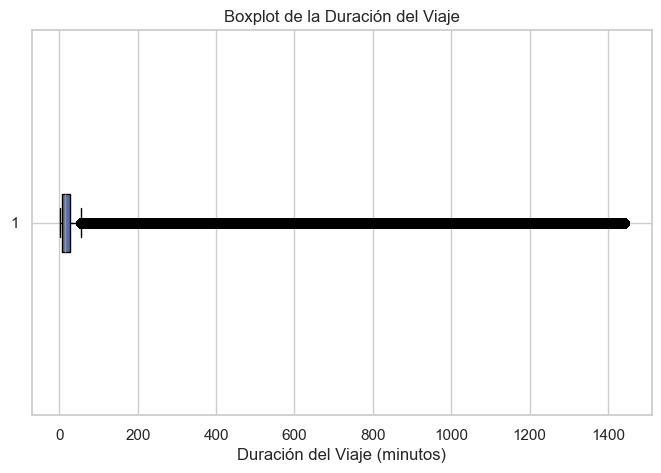

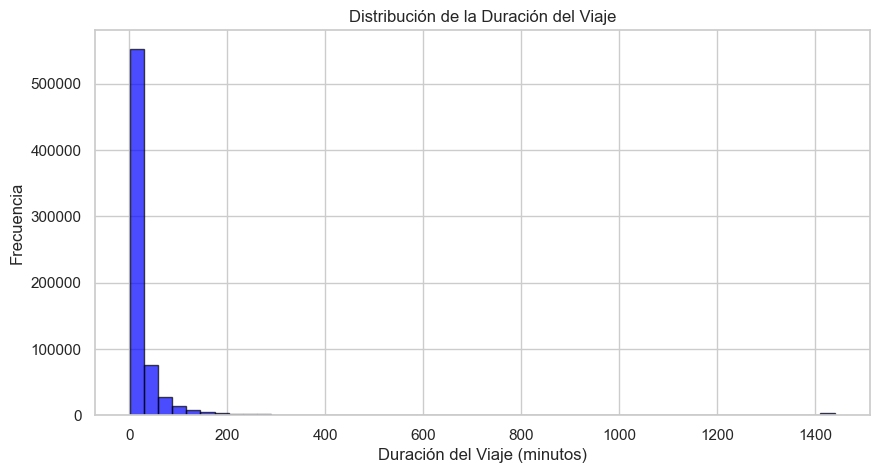

In [13]:
# Boxplot para visualizar los outliers en la duración del viaje
plt.figure(figsize=(8, 5))
plt.boxplot(df["duration"], vert=False, patch_artist=True)
plt.xlabel("Duración del Viaje (minutos)")
plt.title("Boxplot de la Duración del Viaje")
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Histograma para visualizar la distribución de la duración
plt.figure(figsize=(10, 5))
plt.hist(df["duration"], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Duración del Viaje (minutos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Duración del Viaje")
plt.grid(True)

# Mostrar el gráfico
plt.show()



**Boxplot de la Duración del Viaje:**  
   - Se observa una gran cantidad de valores atípicos que superan ampliamente el rango típico de duración.  
   - La mayoría de los viajes están concentrados en una región baja del eje X, mientras que los outliers se extienden hasta **1440 minutos (24 horas)**.  

 **Histograma de la Distribución de la Duración del Viaje:**  
   - La mayoría de los viajes tienen **una duración corta**, pero hay una **cola larga** con valores inusualmente altos.  
   - Algunos viajes superan **las 6 horas e incluso las 24 horas**, lo que sugiere datos posiblemente erróneos o casos especiales.  


In [14]:
# Eliminación de valores atípicos en duración (> 120 minutos)
df_cleaned = df[df["duration"] <= 120]

# Eliminación de registros sin fecha de inicio o fin
df_cleaned = df_cleaned.dropna(subset=["start_time", "end_time"])

# Eliminación de registros con coordenadas faltantes
df_cleaned = df_cleaned.dropna(subset=["start_lat", "start_lon", "end_lat", "end_lon"])


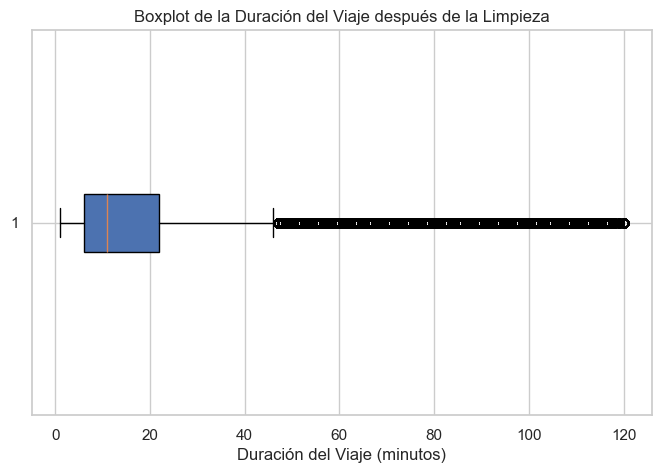

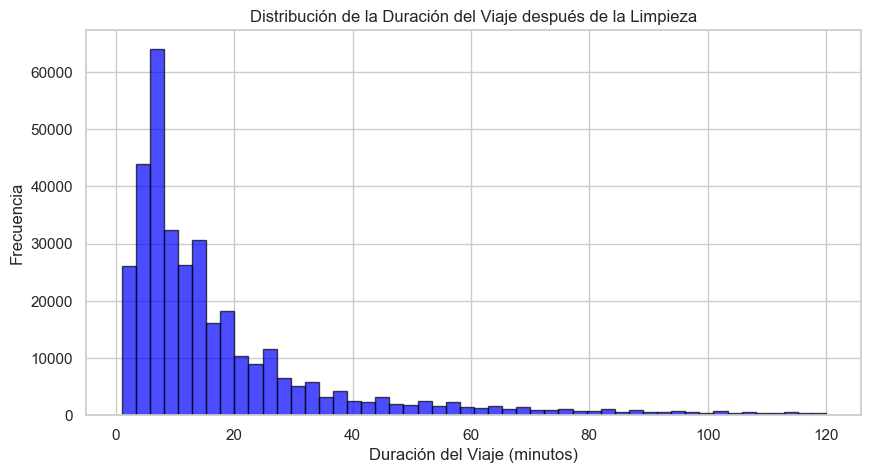

valores nulos: 
duration      0
start_time    0
end_time      0
start_lat     0
start_lon     0
end_lat       0
end_lon       0
dtype: int64
valores máximos: 
120
valores minimos: 
1


In [15]:
# Revisar si aún existen valores nulos en columnas clave
missing_values = df_cleaned[["duration", "start_time", "end_time", "start_lat", "start_lon", "end_lat", "end_lon"]].isnull().sum()

# Revisar si existen valores extremos en la duración
max_duration = df_cleaned["duration"].max()
min_duration = df_cleaned["duration"].min()

# Boxplot actualizado para verificar la ausencia de outliers en duración
plt.figure(figsize=(8, 5))
plt.boxplot(df_cleaned["duration"], vert=False, patch_artist=True)
plt.xlabel("Duración del Viaje (minutos)")
plt.title("Boxplot de la Duración del Viaje después de la Limpieza")
plt.grid(True)
plt.show()

# Histograma actualizado para visualizar la distribución corregida
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned["duration"], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Duración del Viaje (minutos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Duración del Viaje después de la Limpieza")
plt.grid(True)
plt.show()

# Mostrar resumen de verificación
print(f'valores nulos: \n{missing_values}')
print(f'valores máximos: \n{max_duration}')
print(f'valores minimos: \n{min_duration}')

#### Procedimiento
Lo ideal sería buscar la duración promedio de los viajes en bicicleta en la ciudad de Los Angeles, para tener un umbral más realista de cuánto debería ser la duración de los viajes promedio de las personas, buscar datos y fuentes confiables. Por cuestion de tiempo se hizo un sesgo a mi consideración de detener los viajes hasta máximo 120 min, los viajes que superen esa duración serán eliminados.

Para los datos espaciales, opté por eliminar los datos faltantes y los datos que no tenían fecha de inicio o fin, la razón es para que si más adelante quiero hacer un analisis geoespacial, no afecte al momento de gráficar.



### Analisis temporal


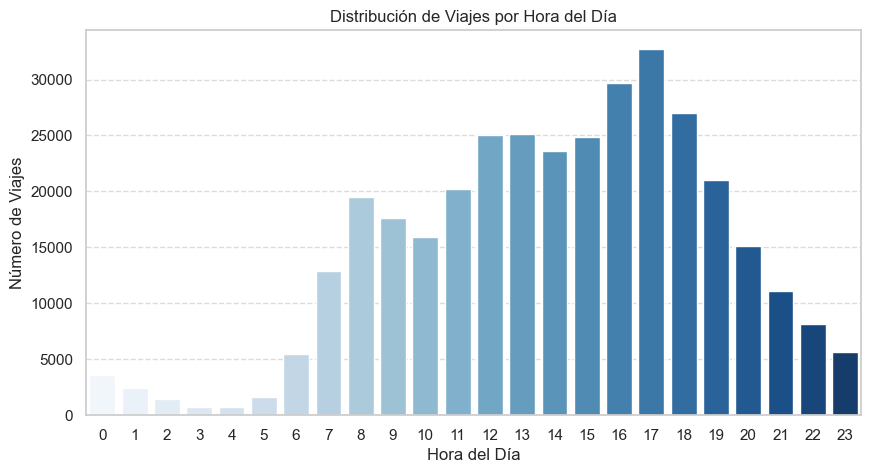

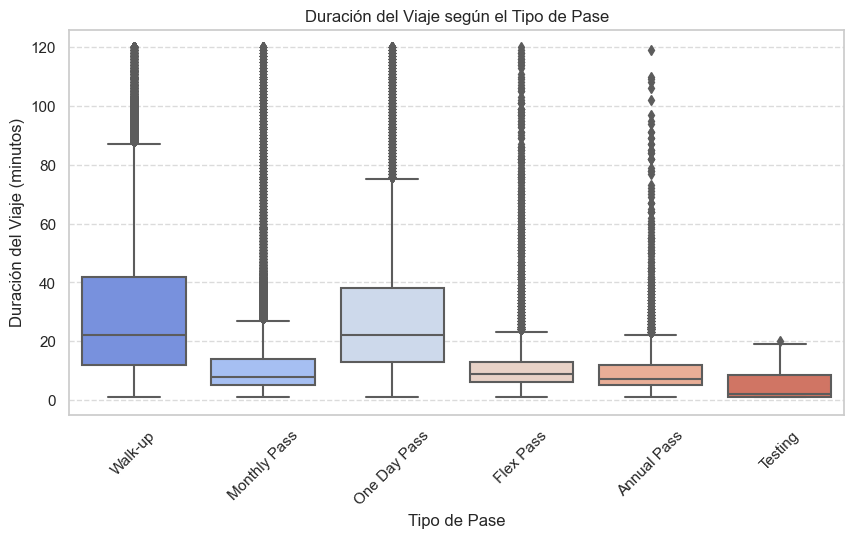

In [16]:
#Análisis Temporal: Distribución de Viajes por Hora del Día

# Extraer la hora del día desde start_time
df_cleaned["hour"] = df_cleaned["start_time"].dt.hour

# Crear gráfico de distribución de viajes por hora
plt.figure(figsize=(10, 5))
sns.countplot(x=df_cleaned["hour"], palette="Blues")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Viajes")
plt.title("Distribución de Viajes por Hora del Día")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Análisis de Relaciones Entre Variables: Duración del Viaje vs. Tipo de Pase

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["passholder_type"], y=df_cleaned["duration"], palette="coolwarm")
plt.xlabel("Tipo de Pase")
plt.ylabel("Duración del Viaje (minutos)")
plt.title("Duración del Viaje según el Tipo de Pase")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### **Distribución de Viajes por Hora del Día**  
**Hallazgos:**
- Se observa una tendencia clara: **los viajes aumentan a lo largo del día y alcanzan su punto máximo entre las 17:00 y 18:00 horas**.  
Esto sugiere que el servicio se usa principalmente para movilidad urbana en horarios laborales, con un pico en la tarde, posiblemente al salir del trabajo o la escuela.  
- Pocas personas usan el servicio en la madrugada (0:00 - 5:00), lo que era de esperarse.  
- Desde las 7:00 AM empieza a incrementarse el uso, lo que indica un posible uso matutino para trasladarse al trabajo o la escuela.   


#### **Duración del Viaje según el Tipo de Pase**  
**Hallazgos:**
- Los usuarios con pase mensual (`Monthly Pass`) hacen viajes más cortos (mediana cercana a 10 minutos).  
- Los usuarios ocasionales (`Walk-up` y `One Day Pass`) tienen viajes más largos (mediana cercana a 20-30 minutos).  
- Los pases anuales (`Annual Pass`) y flexibles (`Flex Pass`) muestran una distribución similar a la del pase mensual, con viajes relativamente cortos. 
- Existen valores atípicos en todos los tipos de pase, pero los usuarios de **Walk-up** y **One Day Pass** presentan los viajes más largos.  

 
Los datos sugieren que **los usuarios frecuentes (mensuales o anuales) usan las bicicletas para trayectos cortos y rápidos**, mientras que los **usuarios esporádicos o turistas las usan para viajes más largos**.  
**Esto podría indicar que los turistas o visitantes usan el servicio más como una actividad recreativa, mientras que los suscriptores lo ven como un medio de transporte diario.**  

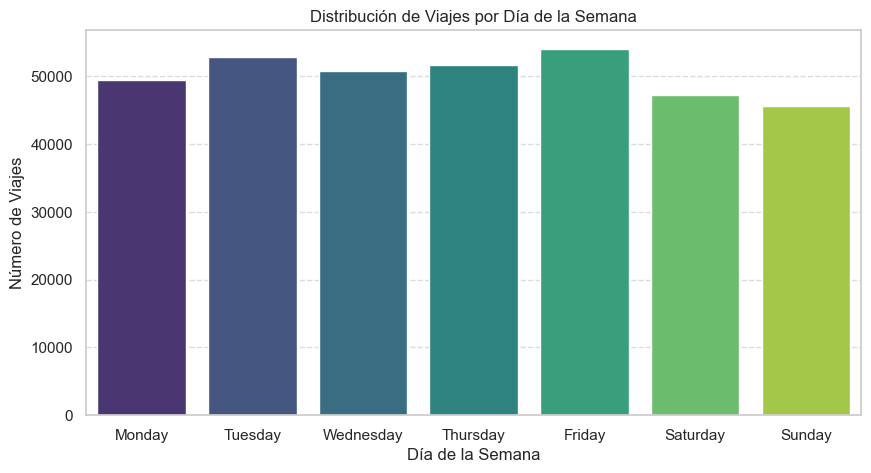

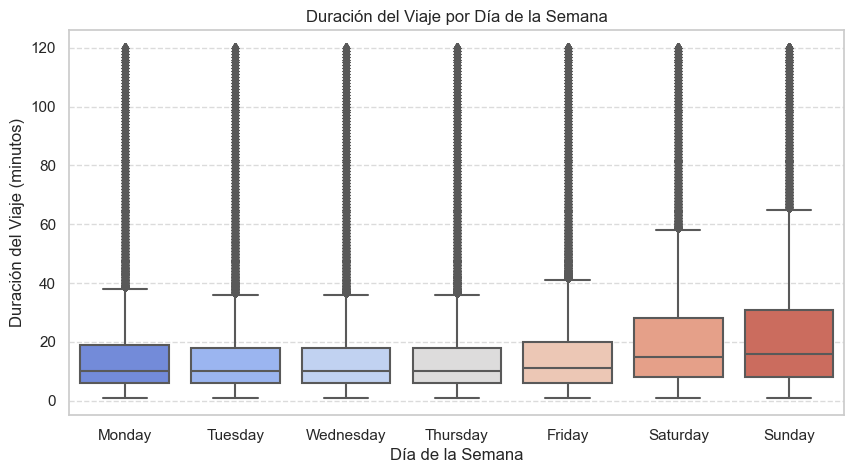

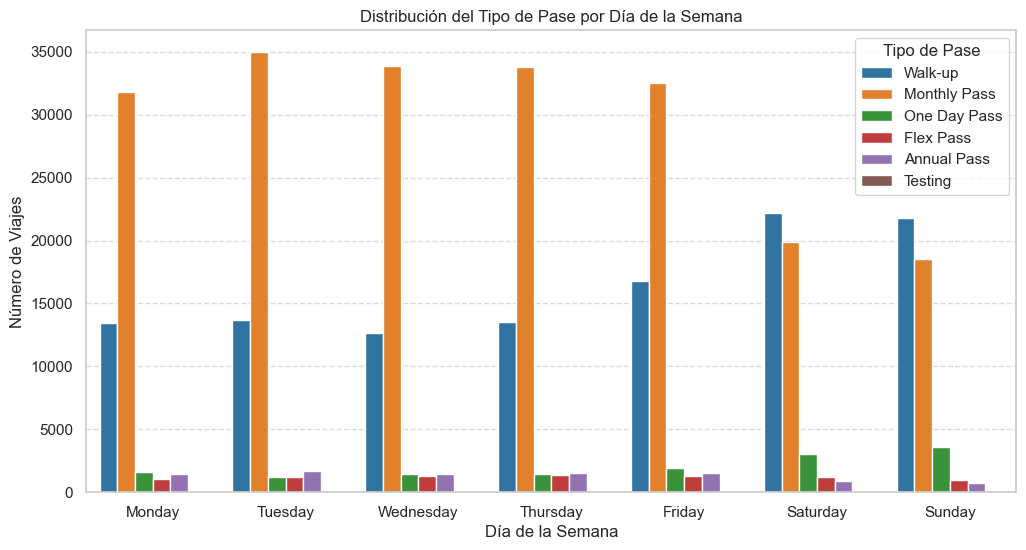

In [17]:
# Análisis de Patrones por Día de la Semana 

# Crear una nueva columna con el día de la semana
df_cleaned["day_of_week"] = df_cleaned["start_time"].dt.day_name()

# Ordenar los días de la semana correctamente
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Distribución del número de viajes por día de la semana
plt.figure(figsize=(10, 5))
sns.countplot(x=df_cleaned["day_of_week"], order=days_order, palette="viridis")
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Viajes")
plt.title("Distribución de Viajes por Día de la Semana")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Duración media del viaje por día de la semana
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["day_of_week"], y=df_cleaned["duration"], order=days_order, palette="coolwarm")
plt.xlabel("Día de la Semana")
plt.ylabel("Duración del Viaje (minutos)")
plt.title("Duración del Viaje por Día de la Semana")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Distribución del tipo de pase por día de la semana
plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned["day_of_week"], hue=df_cleaned["passholder_type"], order=days_order, palette="tab10")
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Viajes")
plt.title("Distribución del Tipo de Pase por Día de la Semana")
plt.legend(title="Tipo de Pase")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### **📊 Análisis de Patrones por Día de la Semana 📅**  

---

### **1️⃣ Distribución del Número de Viajes por Día de la Semana**  
📌 **Hallazgos:**  
- **Los días entre semana tienen un número alto y consistente de viajes**, con un **pico el viernes**.  
- **Sábados y domingos tienen menor cantidad de viajes**, lo que indica un posible cambio en el comportamiento de los usuarios el fin de semana.  
- Esto sugiere que el servicio **es usado principalmente como un medio de transporte diario y no solo como una actividad recreativa**.  

📌 **Conclusión:**  
👉 **La demanda es más alta de lunes a viernes, lo que indica que los usuarios dependen de este servicio en días laborales.**  
👉 **Podría ser útil analizar si hay más usuarios con pase mensual en estos días.**  

---

### **2️⃣ Duración del Viaje por Día de la Semana**  
📌 **Hallazgos:**  
- **La duración promedio del viaje es mayor los fines de semana** (sábado y domingo).  
- **Los viajes de lunes a viernes son más cortos**, lo que sugiere un **uso más funcional, posiblemente para traslados rápidos al trabajo o la escuela**.  
- **En fines de semana, hay mayor dispersión de duraciones**, indicando **posibles viajes recreativos o turísticos**.  

📌 **Conclusión:**  
👉 **Entre semana los viajes son más cortos, lo que indica un uso más estructurado.**  
👉 **Los fines de semana los viajes tienden a durar más, lo que puede sugerir un uso más recreativo.**  

---

### **3️⃣ Distribución del Tipo de Pase por Día de la Semana**  
📌 **Hallazgos:**  
- **Los usuarios con `Monthly Pass` dominan los días laborales.**  
- **Los usuarios `Walk-up` (ocasionales) aumentan significativamente en fines de semana.**  
- **Los `One Day Pass` y `Flex Pass` también crecen los fines de semana, lo que refuerza la idea de que los turistas o usuarios eventuales prefieren este servicio en sábados y domingos.**  

📌 **Conclusión:**  
👉 **El servicio es usado mayormente por suscriptores frecuentes entre semana.**  
👉 **En fines de semana, el servicio tiene más uso por parte de turistas o visitantes.**  

---

### **📌 Próximo Paso:**
✅ **Paso 2 - Análisis Geoespacial** 🌍🚲  
Ahora podemos hacer mapas de calor y trayectorias para analizar **las estaciones más utilizadas y los patrones de movilidad en la ciudad**.  

📌 **¿Quieres que iniciemos con un mapa de calor de las estaciones más utilizadas?** 🚀

### Analisis Geoespacial

In [22]:

# 📌 1️⃣ Mapa de Calor de Estaciones Más Usadas

# Eliminar coordenadas inválidas (por si existen)
df_cleaned = df_cleaned.dropna(subset=["start_lat", "start_lon"])

# Agrupar por estaciones y contar la cantidad de viajes
station_usage = df_cleaned.groupby(["start_lat", "start_lon"]).size().reset_index(name="count")

# Calcular el centro del mapa basado en la media de coordenadas
map_center = [station_usage["start_lat"].mean(), station_usage["start_lon"].mean()]

# Crear mapa base centrado en las estaciones
mapa_calor = folium.Map(location=map_center, zoom_start=13)

# Generar datos de calor y ajustar el radio según la densidad
heat_data = list(zip(station_usage["start_lat"], station_usage["start_lon"], station_usage["count"]))
HeatMap(heat_data, radius=12, blur=10, min_opacity=0.4).add_to(mapa_calor)

# 📌 2️⃣ Mapa de Rutas Más Frecuentes

# Agrupar por inicio y fin de viaje para contar ocurrencias
top_routes = df_cleaned.groupby(["start_lat", "start_lon", "end_lat", "end_lon"]).size().reset_index(name="count")

# Seleccionar las rutas más populares (ajustar el límite según el dataset)
top_routes = top_routes.sort_values("count", ascending=False).head(300)  # Se redujo a 300 para mejorar rendimiento

# Crear mapa de rutas
mapa_rutas = folium.Map(location=map_center, zoom_start=13)

# Agregar líneas de las rutas más utilizadas con opacidad ajustada
for _, row in top_routes.iterrows():
    folium.PolyLine(
        [(row["start_lat"], row["start_lon"]), (row["end_lat"], row["end_lon"])],
        color="darkblue", weight=2.5, opacity=0.6
    ).add_to(mapa_rutas)

# 📌 Guardar mapas como HTML para visualización
mapa_calor.save("mapa_calor.html")
mapa_rutas.save("mapa_rutas.html")

print("✅ Mapas generados y guardados como 'mapa_calor.html' y 'mapa_rutas.html'.")


✅ Mapas generados y guardados como 'mapa_calor.html' y 'mapa_rutas.html'.


from IPython.display import display

display(mapa_calor)

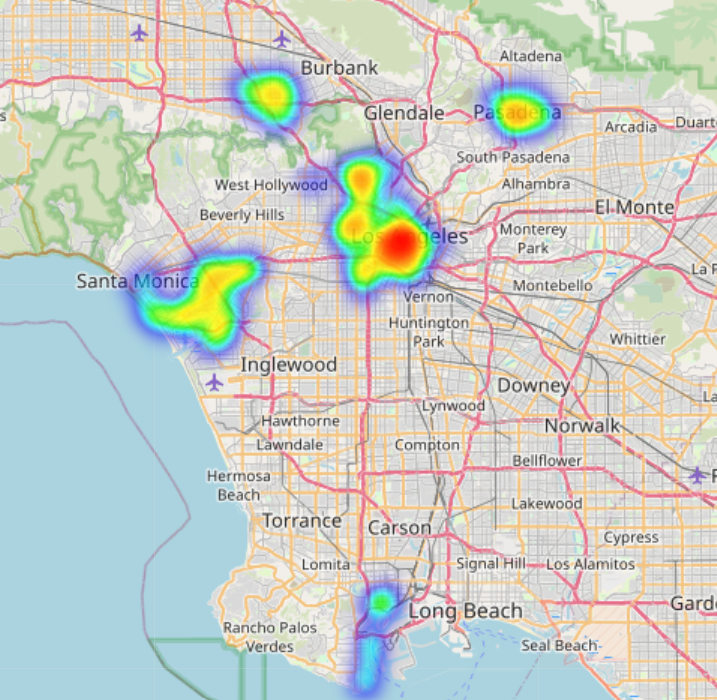


#display(mapa_rutas)

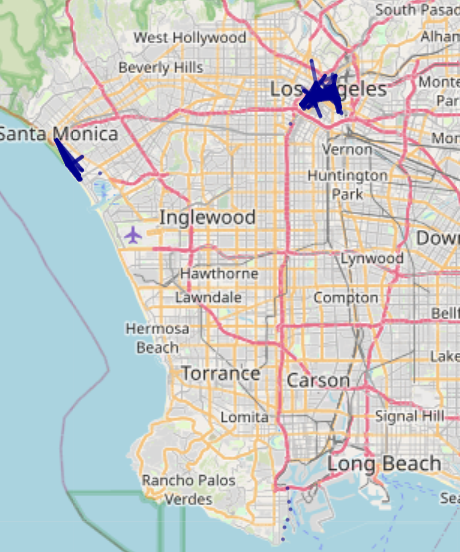



In [ ]:
git add notebooks/EDA.ipynb
git gitcommit -m "Análisis Exploratorio de Datos (EDA) completado"
git push origin main

SyntaxError: invalid syntax (2017190657.py, line 1)